## 0. Package Upload

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data Upload

In [57]:
df = pd.read_csv('../data/train.csv') 

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 데이터는 COLUMN은 다음과 같다.

1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked

### Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin(객실)	Cabin number	
embarked(승선지)	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



### 2. Data EDA

### 1. 데이터 Column 확인

In [60]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [61]:
df['Pclass'].unique()

array([3, 1, 2])

In [62]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [63]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [64]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [65]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [66]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 2. 데이터 Column 변경

In [67]:
del df['Name']

In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.index = df['PassengerId']

In [70]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
def f(x):
    if x == 'male':
        a = 1
    else:
        a = 0
    return a 

In [72]:
df['Sex'] = df['Sex'].apply(lambda x: f(x))

** 남자는 1, 여자는 0 으로 인코딩**

In [73]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [74]:
del df['Ticket']

In [75]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,1,0,3,1,22.0,1,0,7.2500,NaN,S
2,2,1,1,0,38.0,1,0,71.2833,C85,C
3,3,1,3,0,26.0,0,0,7.9250,NaN,S
4,4,1,1,0,35.0,1,0,53.1000,C123,S
5,5,0,3,1,35.0,0,0,8.0500,NaN,S


In [76]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
def g(x):
    if x == 'S':
        return 1
    elif x == 'C':
        return 2
    elif x == 'Q':
        return 3        

embarked(승선지)	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br/>
** S:1, C:2, Q:3 ** 으로 변경

In [79]:
df['Embarked'] = df['Embarked'].map(lambda x: g(x))

In [82]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [83]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [85]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,1,0,3,1,22.0,1,0,7.2500,NaN,1.0
2,2,1,1,0,38.0,1,0,71.2833,C85,2.0
3,3,1,3,0,26.0,0,0,7.9250,NaN,1.0
4,4,1,1,0,35.0,1,0,53.1000,C123,1.0
5,5,0,3,1,35.0,0,0,8.0500,NaN,1.0


### Cabin은 의미가 있을 수 있지만 복잡해질 것 같다.

In [133]:
del df['Cabin']

In [134]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object

In [135]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

### TRAIN 데이터에서 빈 값은 Age와 Cabin, Embarked이다.

In [52]:
df_test = pd.read_csv('../data/test.csv')

In [54]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

### Test 데이터에서 빈 값은 Age와 Fare, Cabin이다.

### 가장 편한 방법은 Train, Test만 있는 Pclass, Sex, SibSp, Parch 만으로 예상하는 것인지만 Fare, Cabin, Age 포함해서 예상할 필요도 있다.

### 3. Visualization

1. Pclass, Sex, SibSp, Parch

In [95]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,1,0,3,1,22.0,1,0,7.2500,NaN,1.0
2,2,1,1,0,38.0,1,0,71.2833,C85,2.0
3,3,1,3,0,26.0,0,0,7.9250,NaN,1.0
4,4,1,1,0,35.0,1,0,53.1000,C123,1.0
5,5,0,3,1,35.0,0,0,8.0500,NaN,1.0


In [137]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


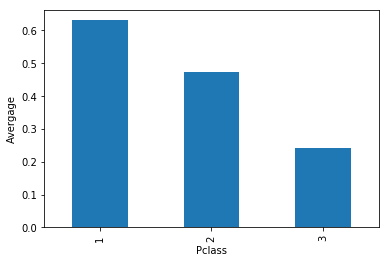

In [138]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.ylabel("Avergage")
plt.show()

부유한 계급일 수록 더 잘 산다.

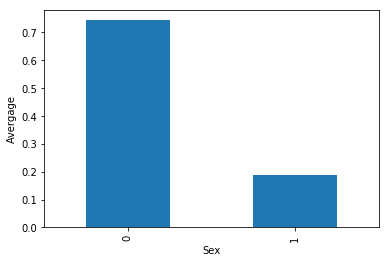

In [139]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.ylabel("Avergage")
plt.show()

여자일수록 더 잘 산다.

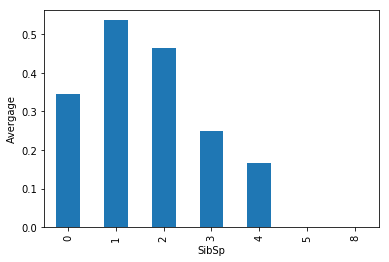

In [140]:
df.groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.ylabel("Avergage")
plt.show()

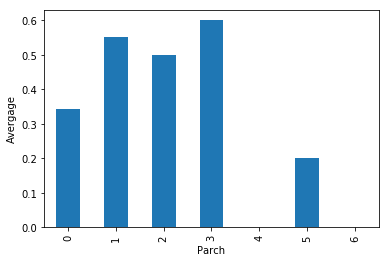

In [141]:
df.groupby('Parch')['Survived'].mean().plot(kind='bar')
plt.ylabel("Avergage")
plt.show()

In [142]:
df.to_pickle('./preprocessed_data.pkl')